In [93]:
import tensorflow as tf
import pandas as pd

from FeedBack import FeedBack
from window import WindowGenerator
from utils import train_test_val_split

# Autoregressive (AR) LSTM

## Dataset

In [94]:
case_1 = pd.read_csv("../datasets/case_1.csv")
case_2 = pd.read_csv("../datasets/case_2.csv")
case_3 = pd.read_csv("../datasets/case_3.csv")
case_4 = pd.read_csv("../datasets/case_4.csv")
case_5 = pd.read_csv("../datasets/case_5.csv")

In [95]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets
feature_count = len(case_1.columns)

In [96]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Train case function

In [97]:
def train_case(case_df:pd.DataFrame, model:FeedBack, in_width:int, out_steps:int, max_epochs:int):
    """ Train model for given case df. """

    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = train_test_val_split(case_df)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        # label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

## Model creation

In [98]:
IN_WIDTH = 8
OUT_STEPS = 8
MAX_EPOCHS = 60
features_size = len(label_columns)

In [99]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS, num_features=feature_count)

In [100]:
feedback_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

## Case 1

In [101]:
window, history = train_case(
    case_df=case_1,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

2022-08-29 14:21:57.104374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-29 14:21:58.973632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [102]:
feedback_model.build(input_shape=window.example[0].shape)
feedback_model.summary()

Model: "feed_back_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell_3 (LSTMCell)      multiple                  39040     
                                                                 
 rnn_3 (RNN)                 multiple                  39040     
                                                                 
 dense_3 (Dense)             multiple                  8976      
                                                                 
Total params: 48,016
Trainable params: 48,016
Non-trainable params: 0
_________________________________________________________________


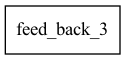

In [103]:
tf.keras.utils.plot_model(feedback_model, "../plots/models/feedback_model.png", show_shapes=True)

2022-08-29 14:22:28.349459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


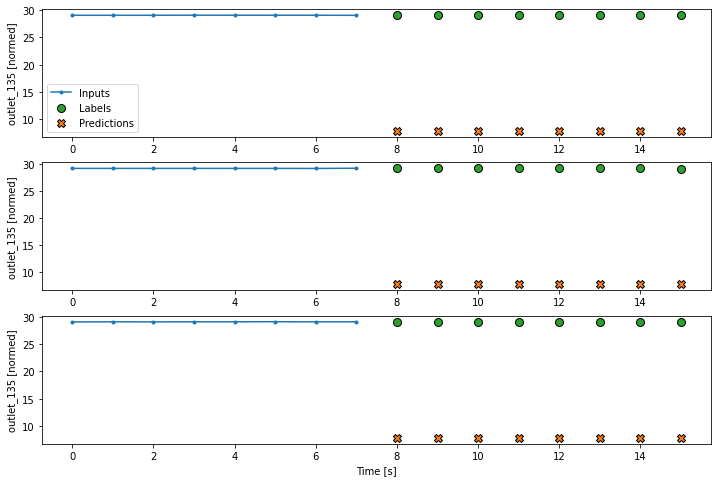

In [104]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

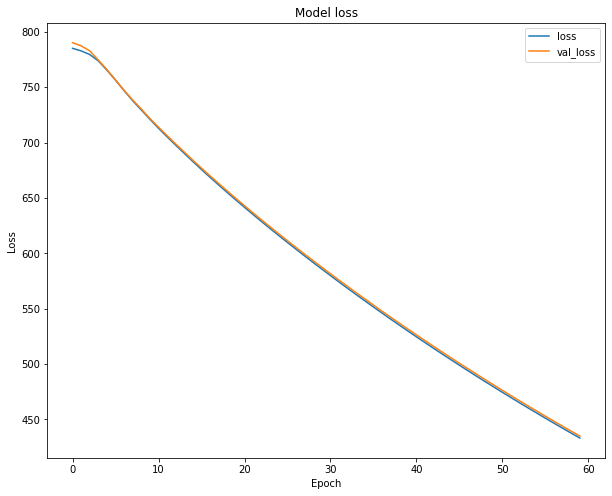

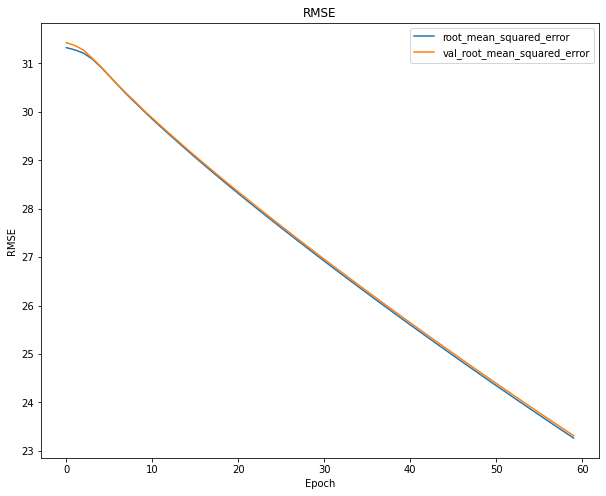

In [105]:
losses = pd.DataFrame(history.history)

losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [106]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 159ms/step - loss: 434.4599 - root_mean_squared_error: 23.3013


[434.45989990234375, 23.30130958557129]

## Case 2

In [107]:
window, history = train_case(
    case_df=case_2,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

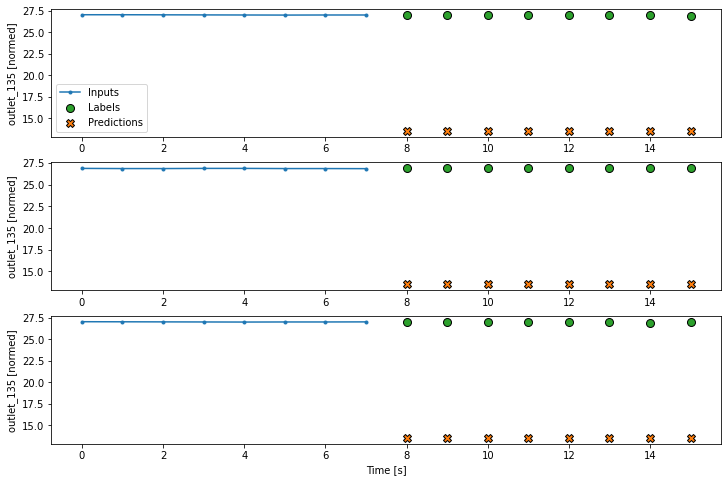

In [108]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

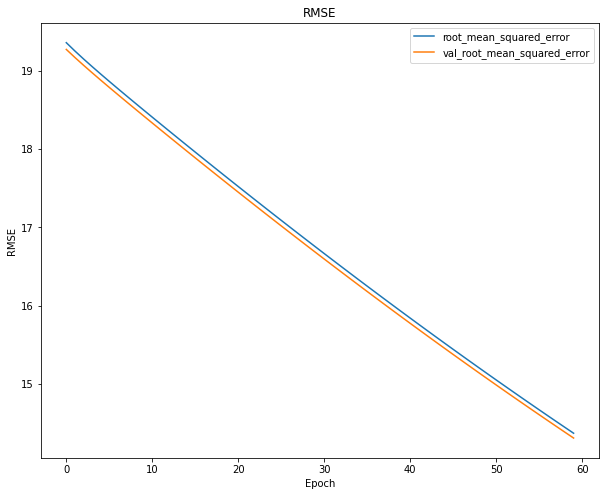

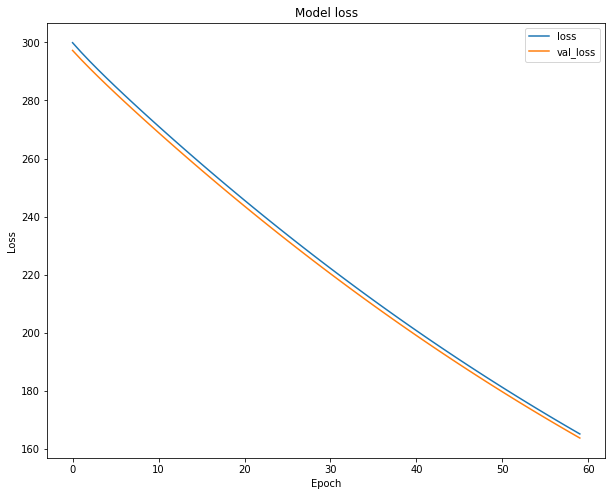

In [109]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [110]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 206ms/step - loss: 165.3029 - root_mean_squared_error: 14.3757


[165.3028564453125, 14.375697135925293]

## Case 3

In [111]:
window, history = train_case(
    case_df=case_3,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

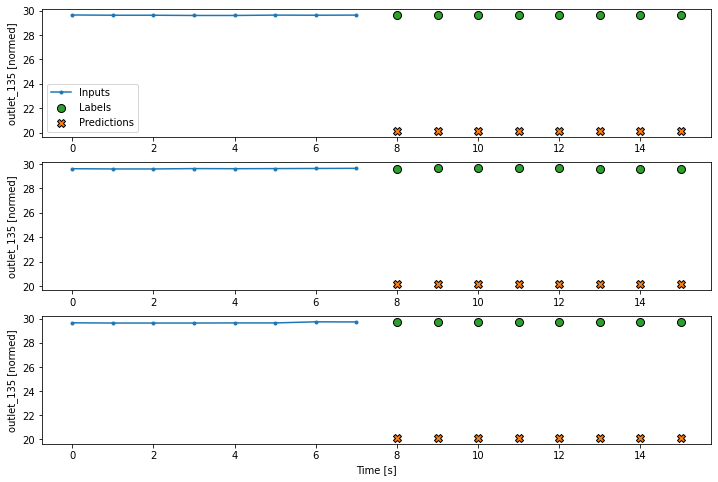

In [112]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

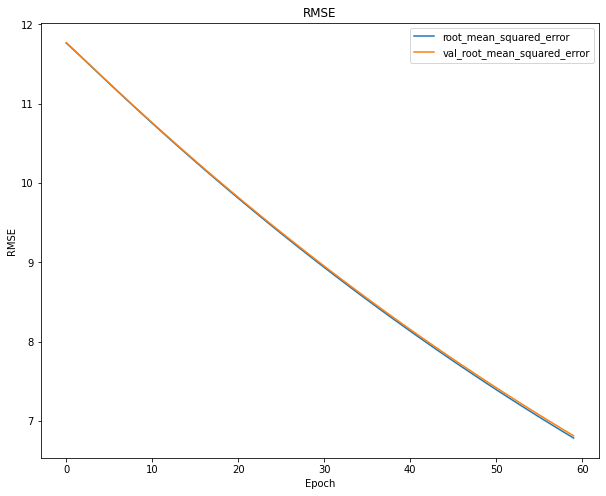

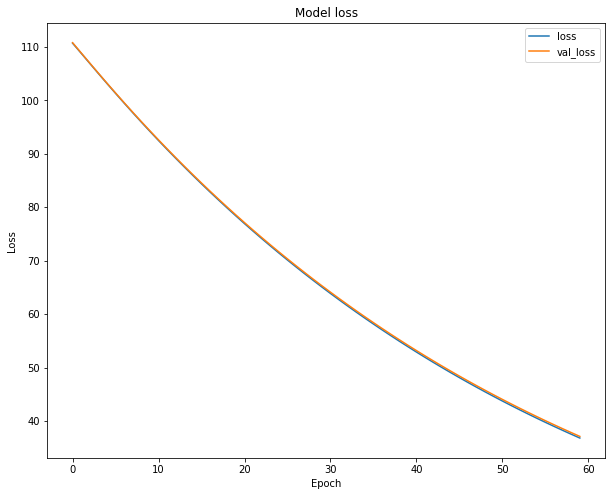

In [113]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [114]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 257ms/step - loss: 36.7416 - root_mean_squared_error: 6.7722


[36.7415885925293, 6.772240161895752]

## Case 4

In [115]:
window, history = train_case(
    case_df=case_4,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

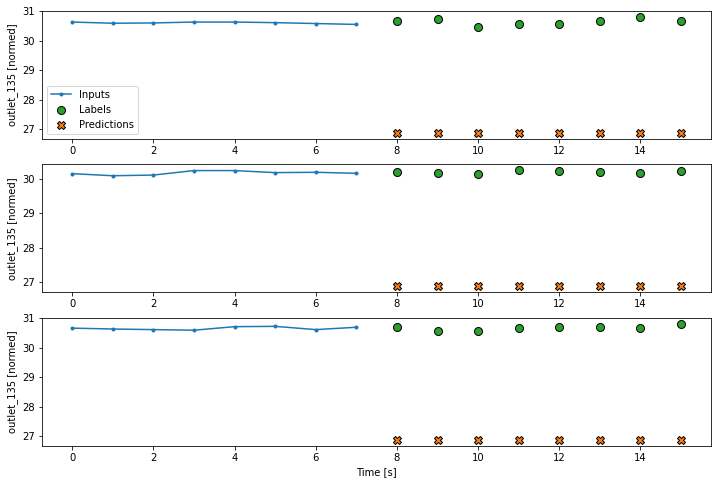

In [116]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

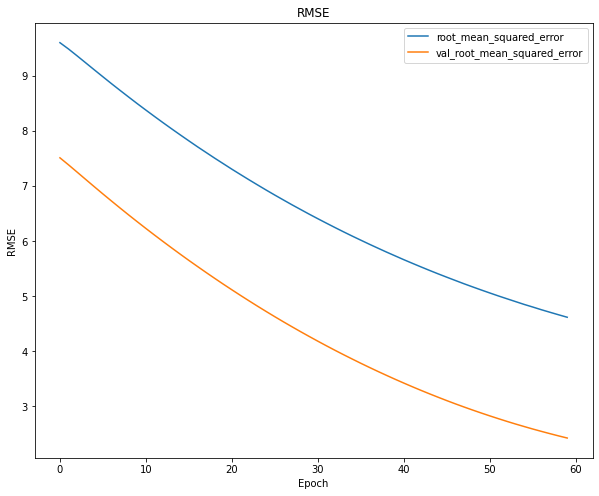

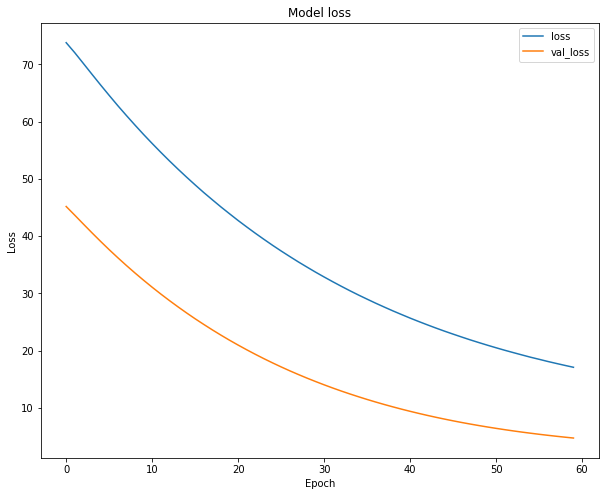

In [117]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [118]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 166ms/step - loss: 4.7806 - root_mean_squared_error: 2.4445


[4.78062629699707, 2.44449782371521]

## Case 5

In [119]:
window, history = train_case(
    case_df=case_5,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

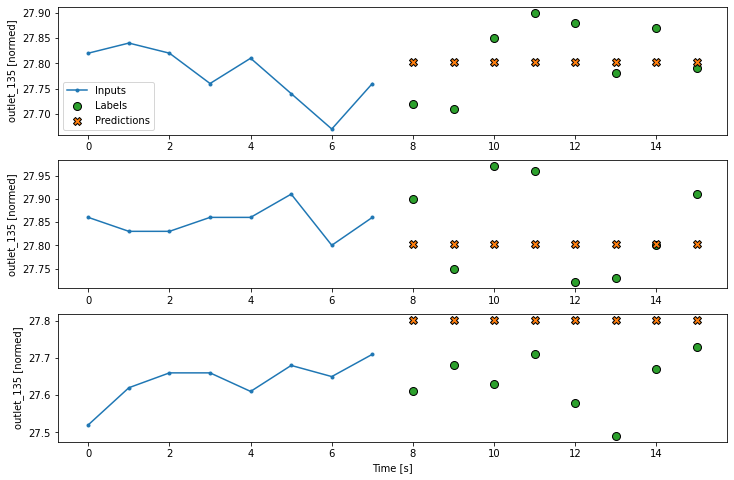

In [120]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

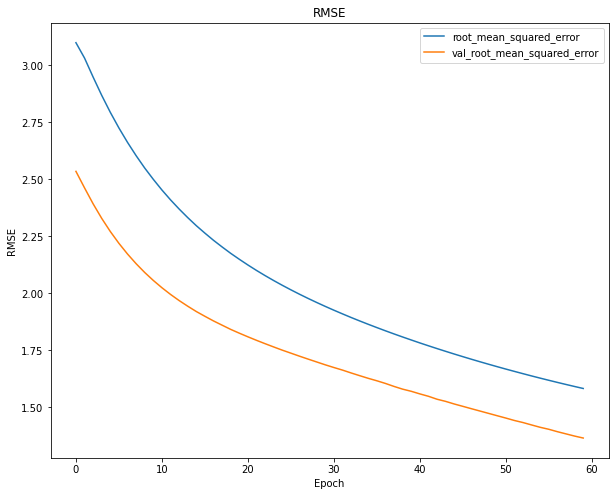

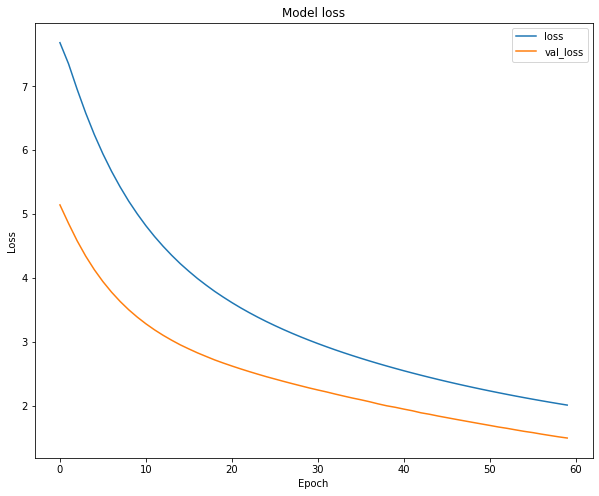

In [121]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [122]:
feedback_model.evaluate(window.test)

2/2 [==============================] - 0s 25ms/step - loss: 2.5519 - root_mean_squared_error: 1.7868


[2.5519094467163086, 1.7867746353149414]